In [2]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [3]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


In [51]:
# Examine data
dfLE.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPxC
count,144.000000,143.000000,143.000000,144.000000,142.000000,136.000000,144.000000,142.000000,144.000000,144.000000,144.000000,1.440000e+02,1.440000e+02,144.000000,144.000000
mean,0.180556,68.677710,170.318182,33.825521,4.683707,77.055498,2528.980469,37.743090,47.016927,81.144630,81.251488,6.035228e+10,1.265734e+07,11.869401,6886.716528
std,0.385992,9.477382,97.992789,128.885354,3.814680,17.547346,8173.532602,16.349793,174.757767,15.855546,16.430304,1.474662e+11,3.827961e+07,3.262735,11457.048837
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,12.875000,0.000000,32.875000,26.812500,5.641797e+05,2.920000e+02,1.531250,117.470000
25%,0.000000,61.631250,102.187500,0.484375,1.240000,66.240385,8.937500,19.646875,0.843750,70.125000,71.765625,1.454911e+09,9.623203e+05,9.873437,735.597500
50%,0.000000,71.387500,147.250000,3.031250,4.161667,79.456250,223.156250,41.734375,3.750000,86.062500,86.437500,6.348886e+09,3.665163e+06,12.184375,2424.225000
75%,0.000000,74.834375,227.000000,22.546875,7.396833,91.828125,1682.531250,51.432812,33.078125,95.234375,95.000000,3.112720e+10,1.034789e+07,14.082812,6083.727500
max,1.000000,82.537500,550.062500,1366.687500,13.497333,99.000000,65857.937500,83.300000,1812.500000,99.000000,99.000000,1.004677e+12,4.214677e+08,20.037500,63337.610000


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [55]:
#Part 1
# Cleaning data
#dfLE = dfLE.dropna(subset=['GDP','Population']) 
dfLE = dfLE.dropna() 
# Creating new column labeled as GDPxC (GDP per capita)
dfLE['GDPxC'] = round(dfLE['GDP'] / dfLE['Population'] ,2) 
# Print labels with just that column, 10 random rows of that data.
dfLE[['Country', 'GDPxC']].sample(n = 10, random_state = 2).sort_values(by='GDPxC')

  


C:\Users\fredy\AppData\Local\Temp\ipykernel_17892\3325879120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLE['GDPxC'] = round(dfLE['GDP'] / dfLE['Population'] ,2)


,Country,GDPxC
155,SolomonIslands,996.23
73,Honduras,1508.15
51,Ecuador,1989.04
3,Angola,2146.26
115,Namibia,2612.83
6,Armenia,2857.80
149,Serbia,3764.67
157,SouthAfrica,4174.54
16,Belize,4243.84
66,Greece,24099.38


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

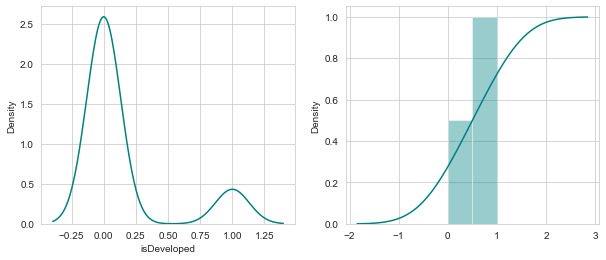

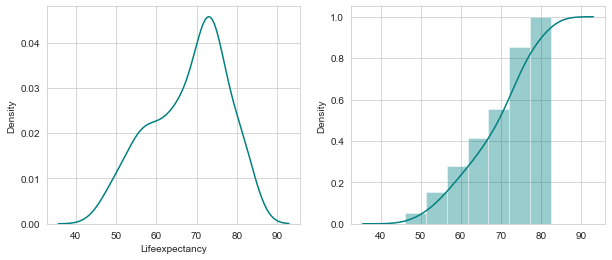

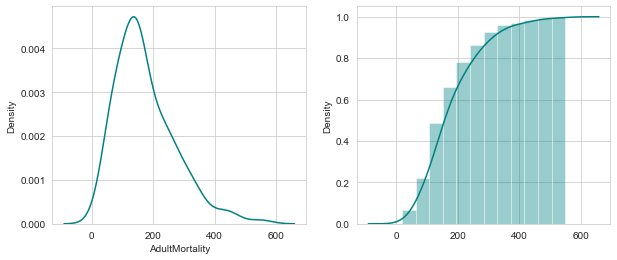

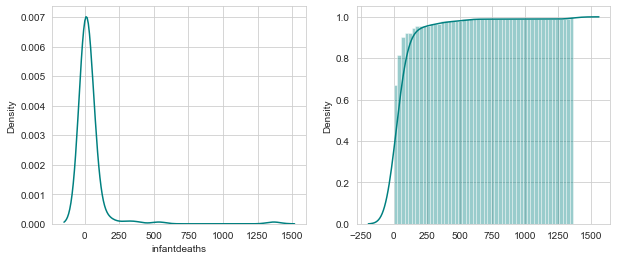

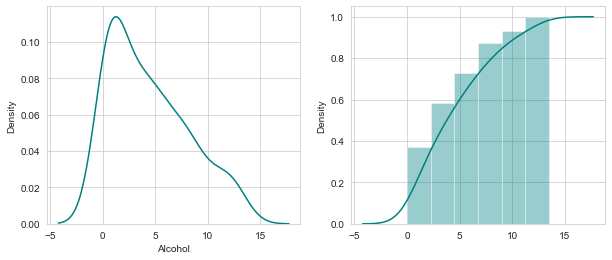

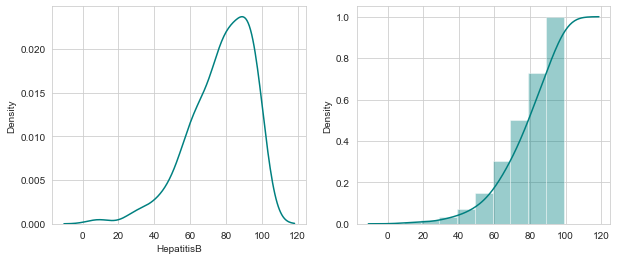

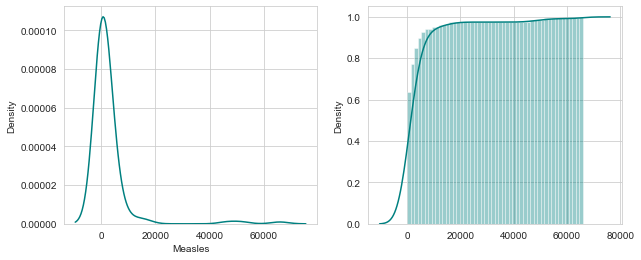

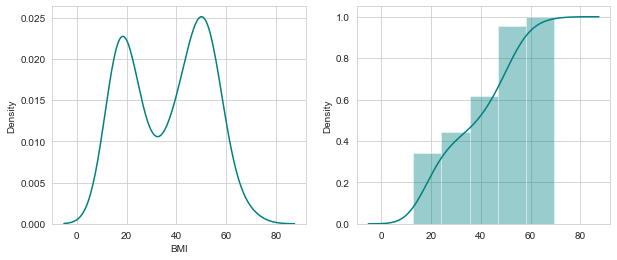

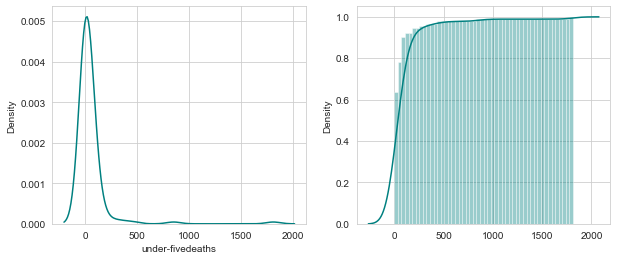

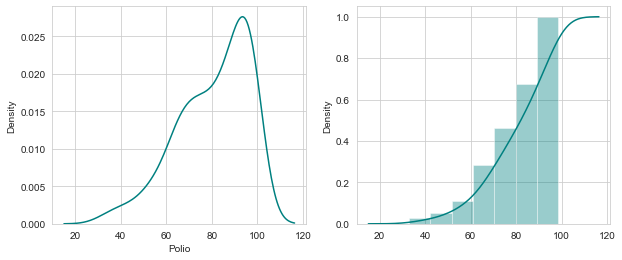

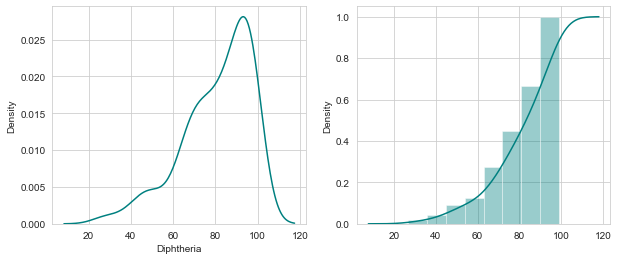

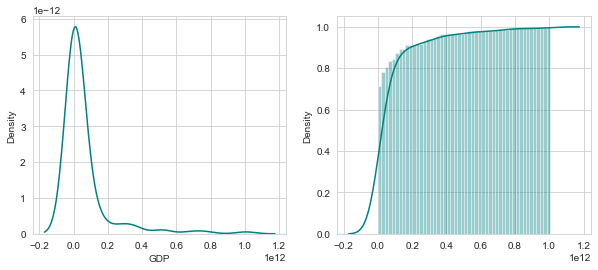

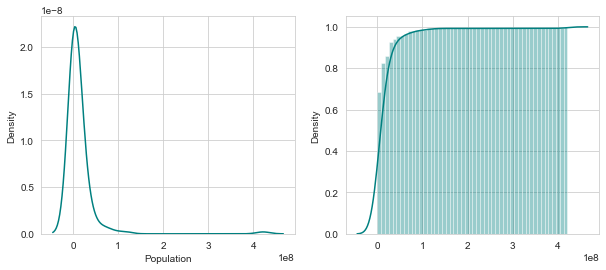

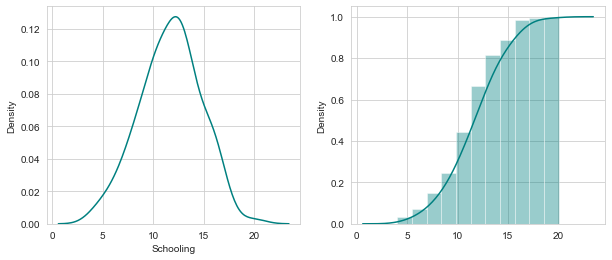

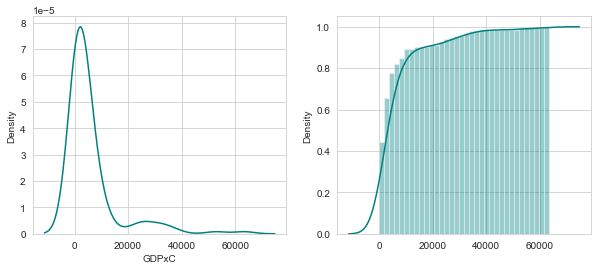

In [72]:
##using a loop to print all numeric variables
#Print all distributions

numerical = dfLE.select_dtypes('number').columns
sns.set_style("whitegrid")  # Setting style
kwargs = {'cumulative': True}
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # Density
    sns.kdeplot(dfLE[col], ax=ax[0], color = 'teal')

    #Histogram
    #sns.histplot(data=dfLE, x=col, ax=ax[0])
    hi = thinkstats2.Hist(dfLE[col])

    # CDF - Histogram
    sns.distplot(hi, hist_kws=kwargs, kde_kws=kwargs, color = 'teal')    
    # sns.distplot(hi ,hist_kws=kwargs, kde = True , color = 'teal'\
    #              , kde_kws=dict(linewidth = 2 , color = 'black'))
 




### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

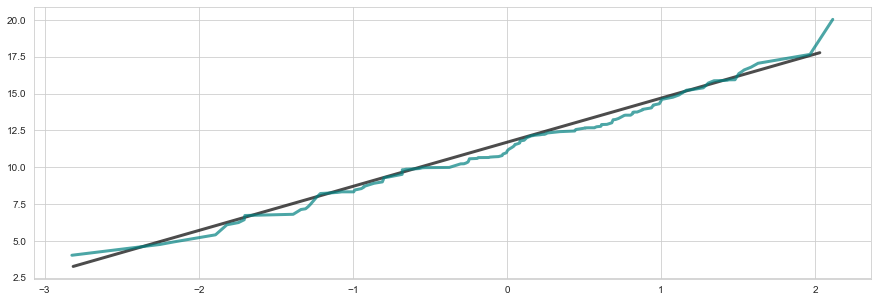

In [82]:
#Create probability plot and Check and see if Scholing data fits a normal dist.
s1 = pd.Series(dfLE['Schooling'])
thinkstats2.NormalProbabilityPlot(s1,color = 'teal', fit_color= 'black')

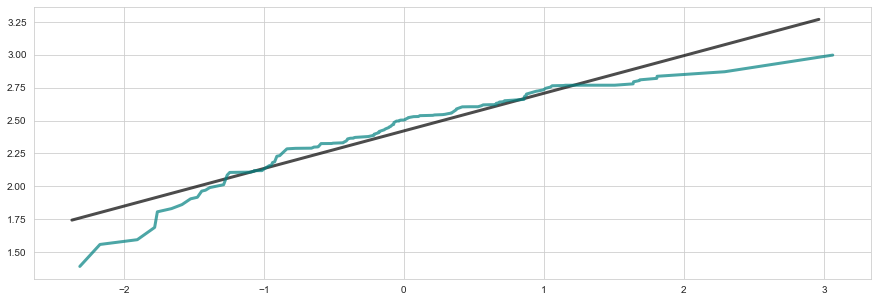

In [86]:
#LogNormal Prob Plot
thinkstats2.NormalProbabilityPlot(np.log(s1),color = 'teal', fit_color = 'black')

Result for Schooling : Clearly the data for Schooling fits to a normal distribution than a log dist.

In [87]:
#Make analytical dist.
mu1 = dfLE['Schooling'].mean()
sigma1 = dfLE['Schooling'].std()
mu1, sigma1

(11.691823308270681, 3.0064598793967483)

In [89]:
#Make distribution
s2 = ss.norm(mu1,sigma1)

{'xscale': 'linear', 'yscale': 'linear'}

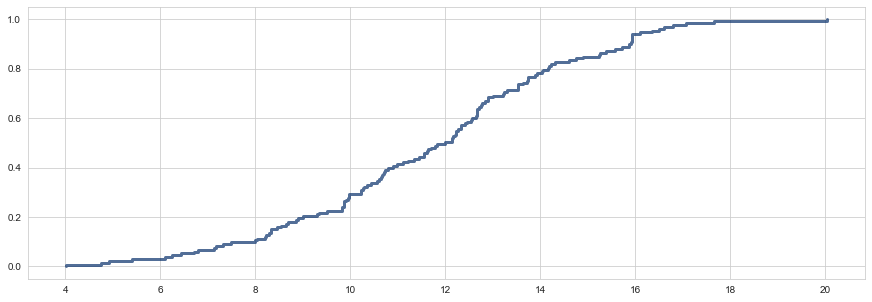

In [90]:
#Make emperical
cdfSch = thinkstats2.Cdf(s1)
thinkplot.Cdf(cdfSch)

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

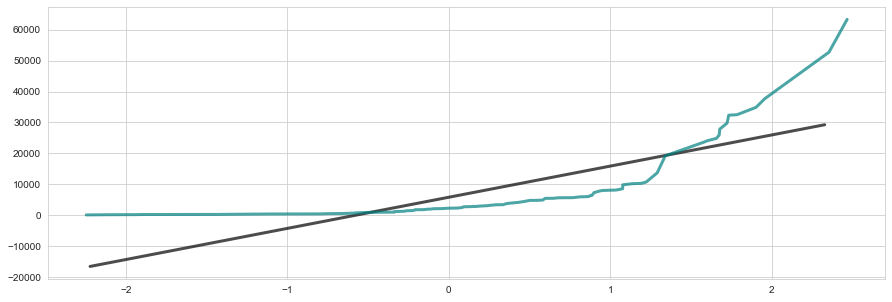

In [91]:
#Analytical for GDP/capita
#Create probability plot and Check and see if Scholing data fits a normal dist.
s1 = pd.Series(dfLE['GDPxC'])
thinkstats2.NormalProbabilityPlot(s1,color = 'teal', fit_color= 'black')


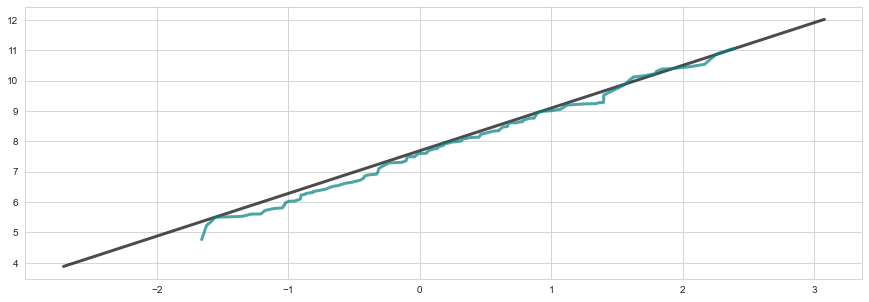

In [92]:
#LogNormal Prob Plot
thinkstats2.NormalProbabilityPlot(np.log(s1),color = 'teal', fit_color = 'black')

Result for GDP per capita : Clearly the data for GDP per capita fits to a log distribution than a normal dist.

In [95]:
#Make analytical dist.
mu2 = dfLE['GDPxC'].mean()
sigma2 = dfLE['GDPxC'].std()
mu2, sigma2

(5831.13112781955, 10101.738264242975)

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

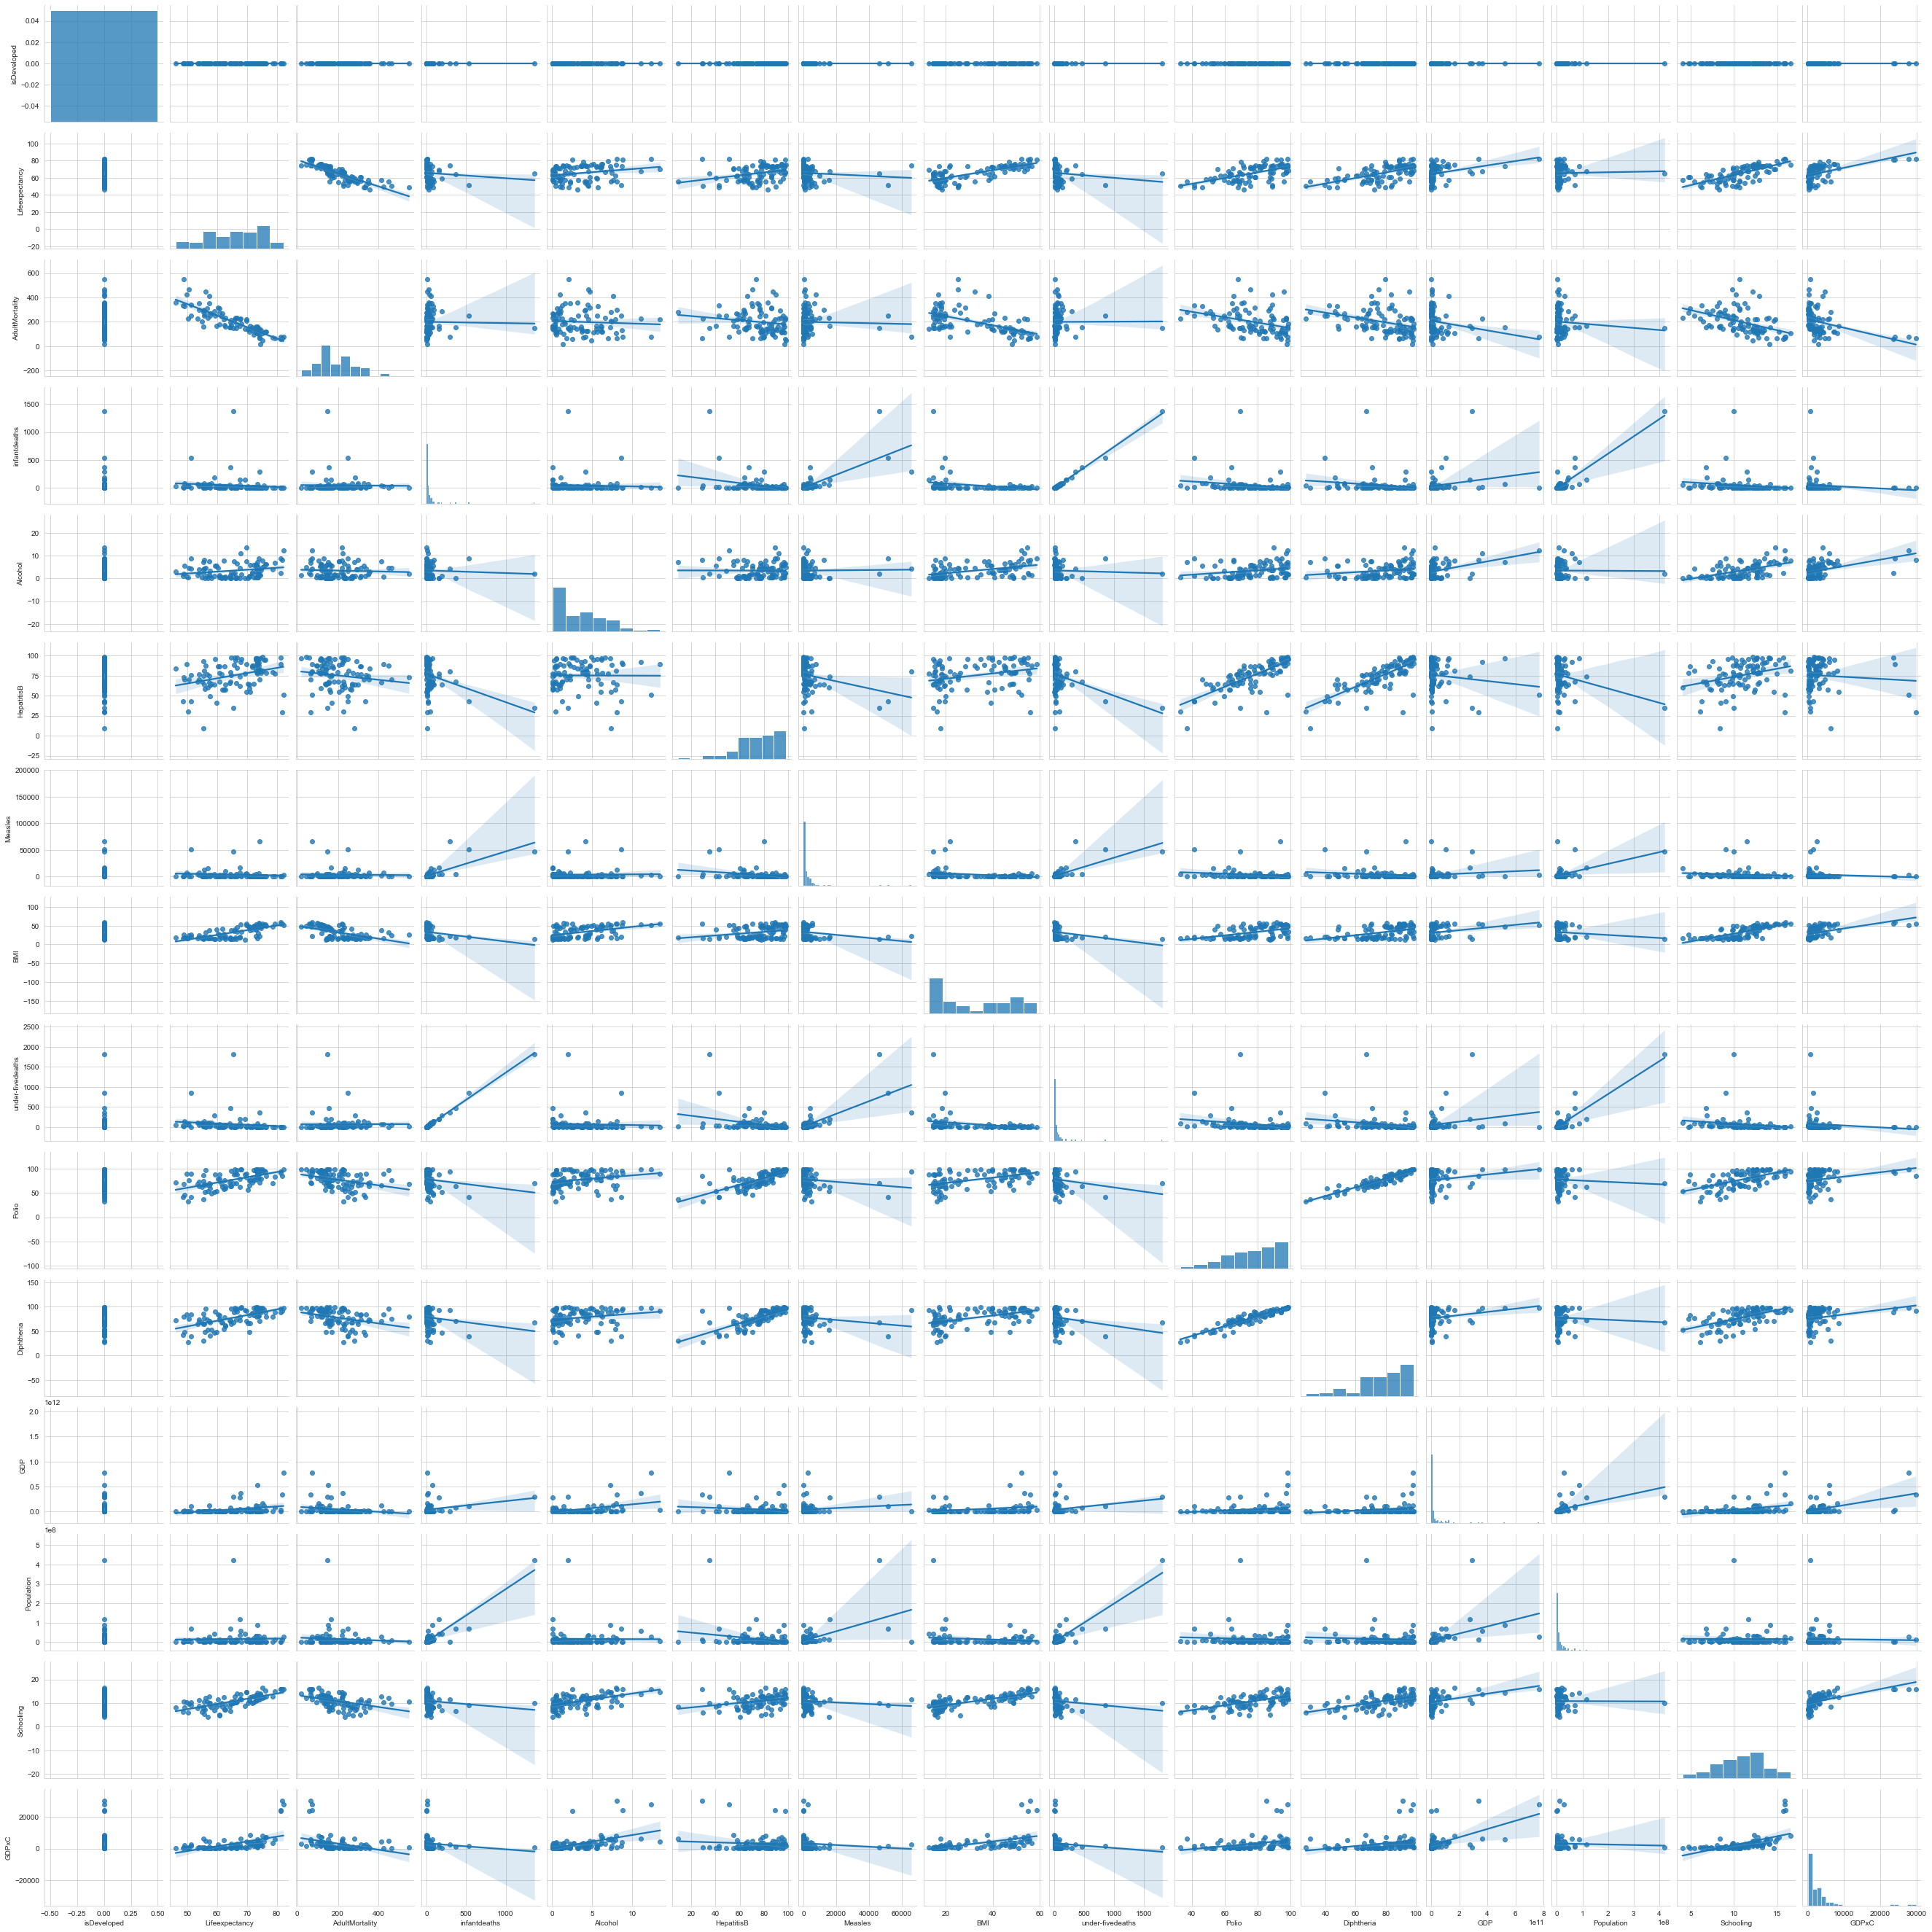

In [108]:
#Visualize correlations.
# Separate data 
devc = dfLE[dfLE['isDeveloped'] == 0]

#Filter out 0s. Rerun graphs. 
devc = devc[devc["under-fivedeaths"] > 0]
devc = devc[devc["AdultMortality"] > 0]
devc = devc[devc["Schooling"] > 0]
devc = devc[devc["BMI"] > 0] 


#isDeveloped	Lifeexpectancy	AdultMortality	
# infantdeaths	Alcohol	HepatitisB	Measles	
# BMI	under-fivedeaths	Polio	
# Diphtheria	GDP	Population	Schooling	GDPxC
#devc = devc.drop(columns={'isDeveloped','Alcohol','HepatitisB','Measles','Polio','Diphtheria','BMI'})
sns.pairplot(devc, kind='reg')

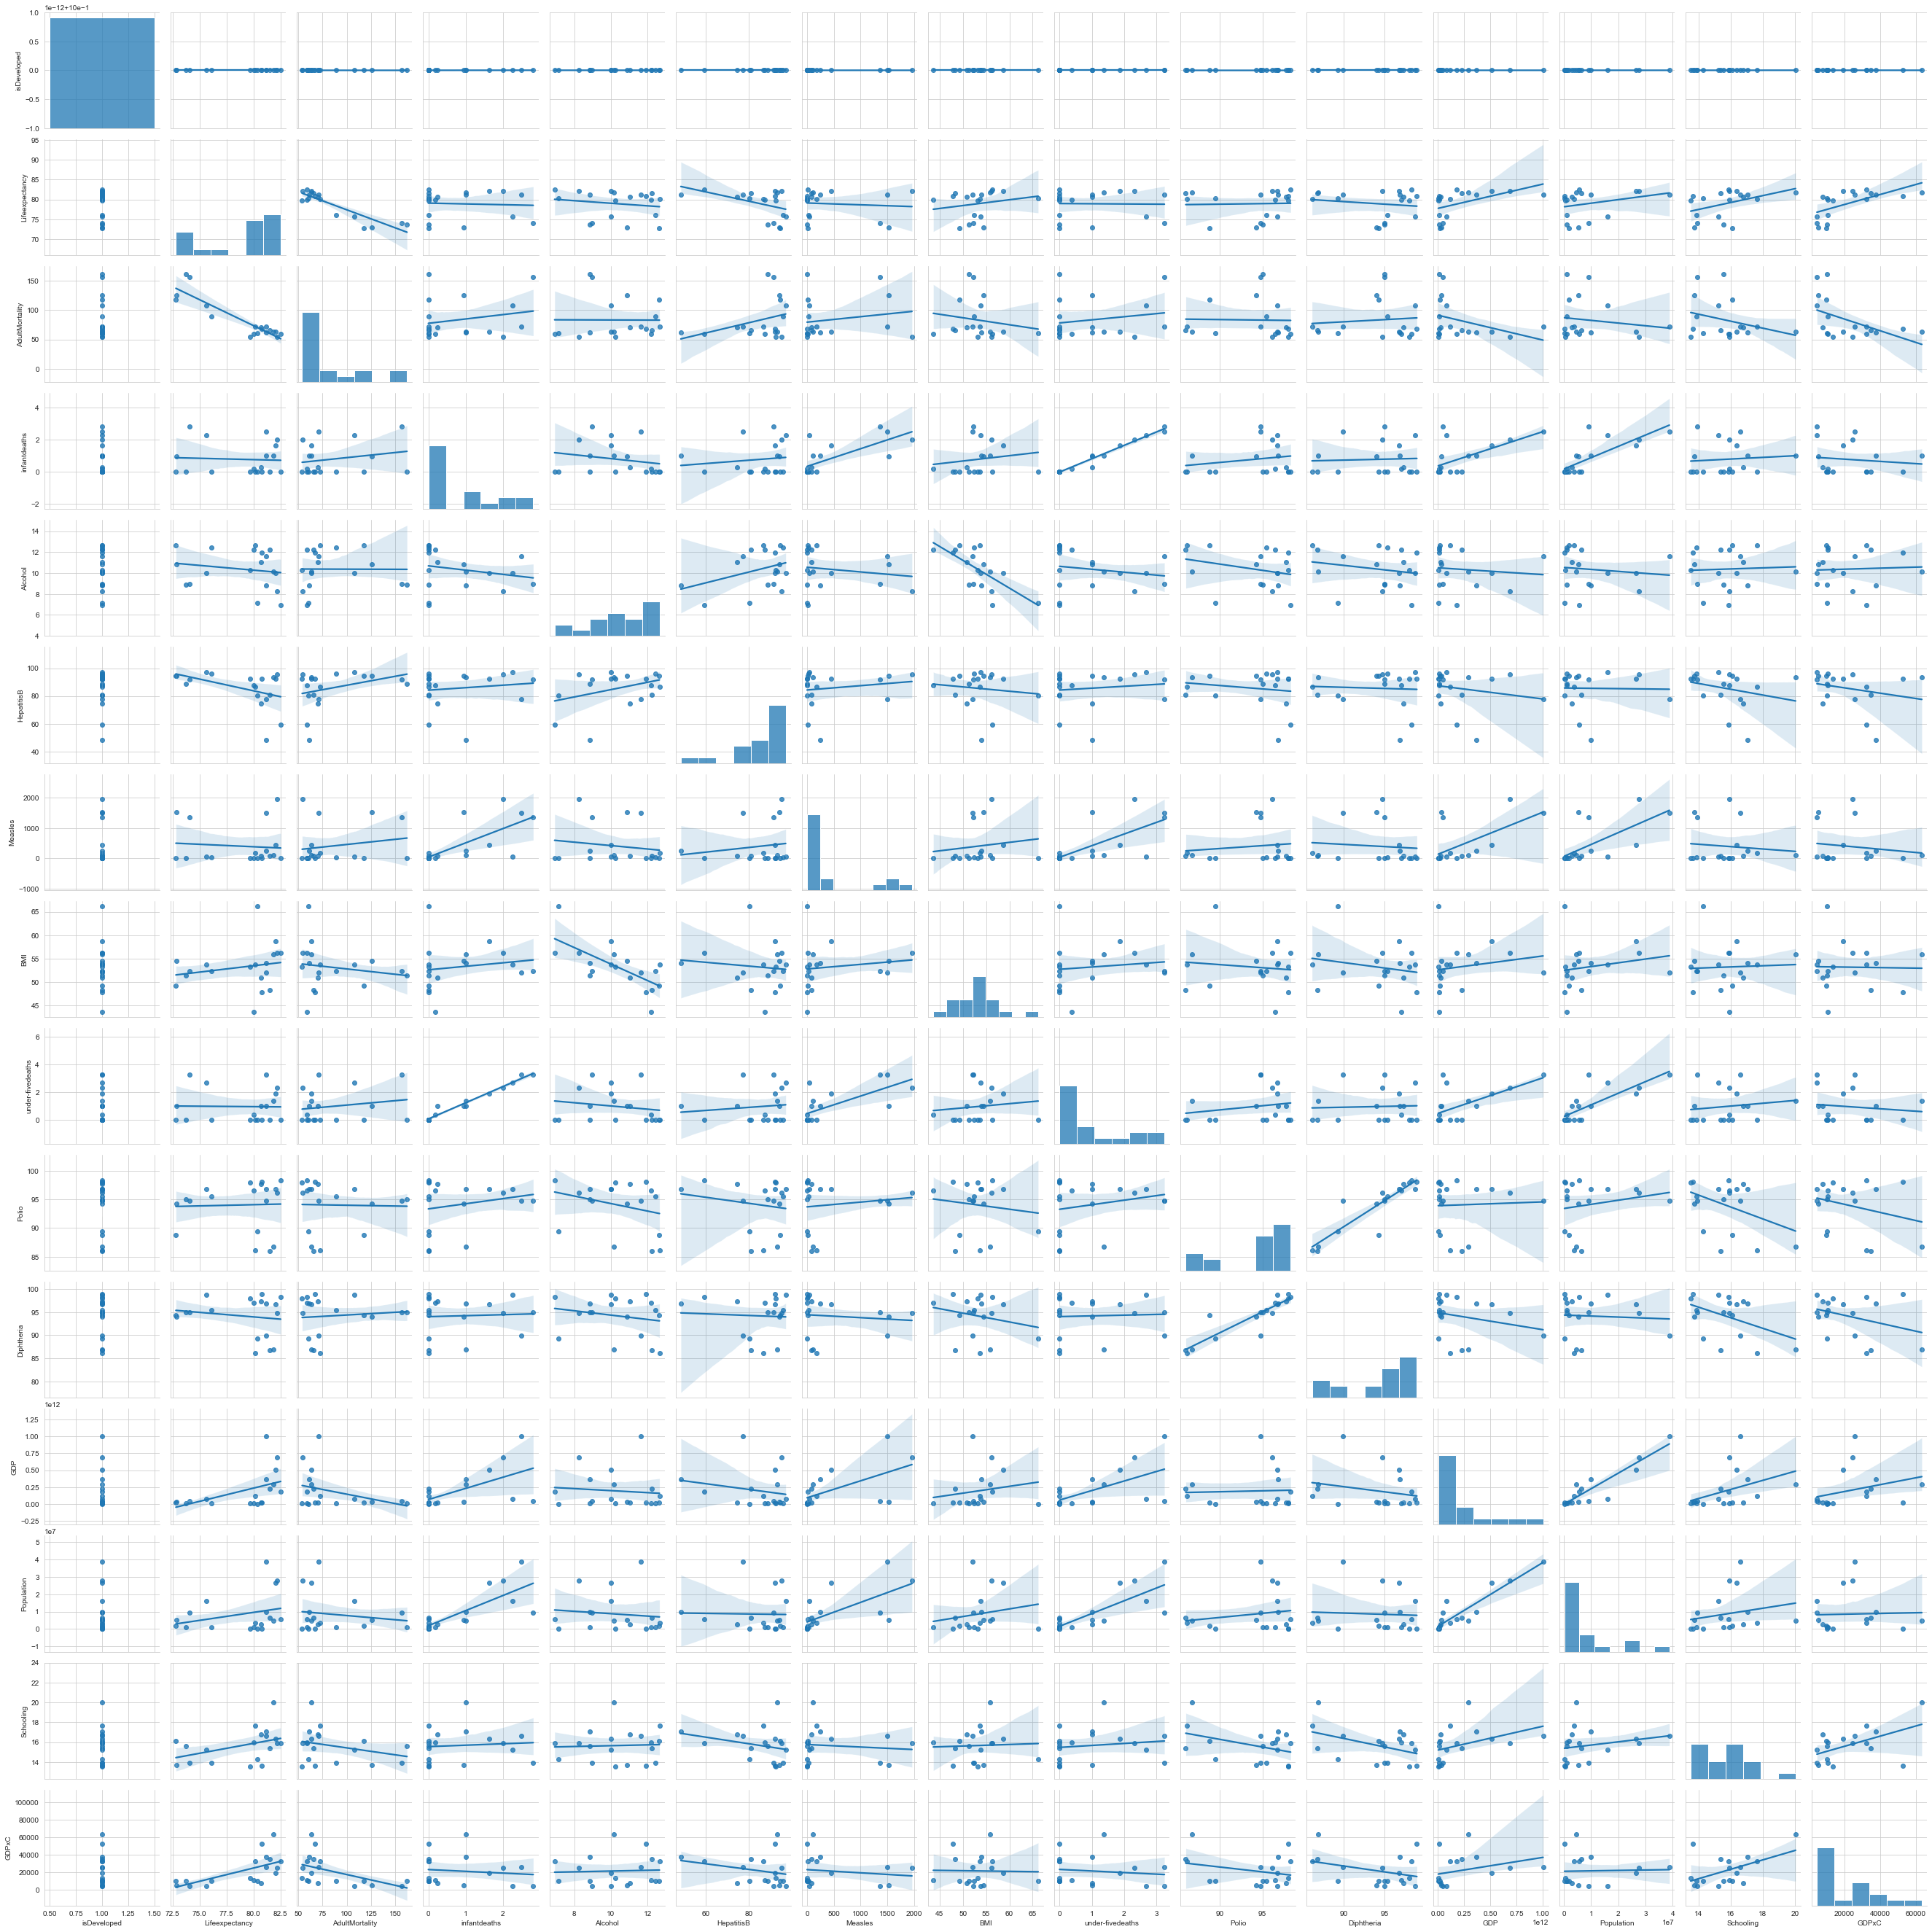

In [109]:
#Visualize correlations. 
devc1 = dfLE[dfLE['isDeveloped'] == 1]
#devc1 = devc1.drop(columns={'isDeveloped','Alcohol','HepatitisB','Measles','Polio','Diphtheria','BMI'})
sns.pairplot(devc1, kind='reg')

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [116]:
#Calculate correlations and analyze. 
#isDeveloped	Lifeexpectancy	AdultMortality	
# infantdeaths	Alcohol	HepatitisB	Measles	
# BMI	under-fivedeaths	Polio	
# Diphtheria	GDP	Population	Schooling	GDPxC
print("GDPxCapita-Lifeexpectancy:", thinkstats2.Corr(devc["GDPxC"], devc["Lifeexpectancy"]), thinkstats2.SpearmanCorr(devc["GDPxC"], devc["Lifeexpectancy"]))
print("Schooling-GDP:", thinkstats2.Corr(devc["Schooling"], devc["GDP"]), thinkstats2.SpearmanCorr(devc["Schooling"], devc["GDP"]))
print("isDeveloped-infantdeaths:", thinkstats2.Corr(devc["Lifeexpectancy"], devc["BMI"]), thinkstats2.SpearmanCorr(devc["Lifeexpectancy"], devc["BMI"]))

GDPxCapita-Lifeexpectancy: 0.5205625784013193 0.6624948995340196
Schooling-GDP: 0.3641963590693572 0.45345464054640583
isDeveloped-infantdeaths: 0.7542948686334154 0.7300124961894774


In [117]:
print("GDPxCapita-Lifeexpectancy:", thinkstats2.Corr(devc1["GDPxC"], devc1["Lifeexpectancy"]), thinkstats2.SpearmanCorr(devc1["GDPxC"], devc1["Lifeexpectancy"]))
print("Schooling-GDP:", thinkstats2.Corr(devc1["Schooling"], devc1["GDP"]), thinkstats2.SpearmanCorr(devc1["Schooling"], devc1["GDP"]))
print("isDeveloped-infantdeaths:", thinkstats2.Corr(devc1["Lifeexpectancy"], devc1["BMI"]), thinkstats2.SpearmanCorr(devc1["Lifeexpectancy"], devc1["BMI"]))

GDPxCapita-Lifeexpectancy: 0.6204987857665772 0.712280701754386
Schooling-GDP: 0.4016037878855818 0.5631578947368421
isDeveloped-infantdeaths: 0.1998512554020816 0.3701754385964912


<b>Do they appear to be supported by reality? Do you have reason to beleive any are causal? </b>
<ul>
  <li>GDPxCapita-Lifeexpectancy:  GDP per capita increases the life expectancy at birth through increasing economic growth and development in a country and thus leads to the prolongation of longevity. </li>
  <li>Schooling-GDP:Increasing the level of education in society increases the production capacity by increasing the quality of labor. An increase in the quality of labor can be achieved through investment in human capital. </li>
  <li>isDeveloped-infantdeaths: Mothers and children in high-income countries generally have much greater access to resources than mothers and children in poor countries. They have enough food and good medical care wich increased infant mortality in low-income countries</li>
</ul>